Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [2]:
# Pandas_datareader is a module for accessing online data
import pandas_datareader as pdr # Need to first install pandas-datareader package
from pandas_datareader import data, wb

# pdr.get_data_fred('GS10') # Test

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [4]:
for stock in tech_list:   
    # Set Stock Ticker as the DataFrame's name.
    globals()[stock] = pdr.yahoo.daily.YahooDailyReader(stock, start, end).read()

In [5]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-26,216.339996,208.100006,213.850006,210.080002,37111600.0,208.169846
2020-10-27,214.669998,210.330002,211.589996,213.250000,36700300.0,211.311005
2020-10-28,208.839996,202.100006,207.669998,202.679993,51195600.0,200.837097
2020-10-29,207.360001,203.369995,204.070007,204.720001,31432600.0,202.858566
2020-10-30,204.289993,199.619995,203.500000,202.470001,36953700.0,200.629028


In [6]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,255.854603,251.640952,253.678532,253.904484,2.634692e+07,253.039016
std,30.625541,30.770478,30.744618,30.844471,8.386348e+06,31.368077
min,204.289993,199.619995,203.500000,202.330002,1.055060e+07,200.490295
25%,232.485004,226.295006,229.420002,227.517498,2.039095e+07,226.559624
50%,251.185005,247.040001,248.595001,249.190002,2.474305e+07,248.349998
75%,286.884995,282.800003,285.117508,284.205002,3.037372e+07,284.068947
max,311.089996,307.799988,310.399994,310.760010,6.987060e+07,310.760010


In [7]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-26 to 2021-10-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

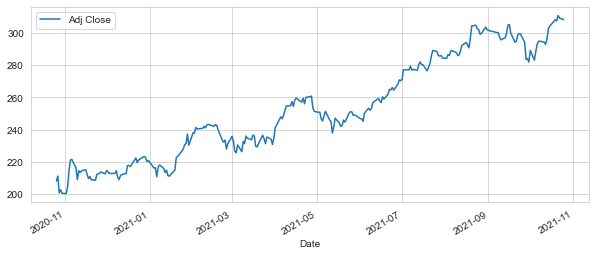

In [8]:
# Let's see a historical view of the closing price
MSFT['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

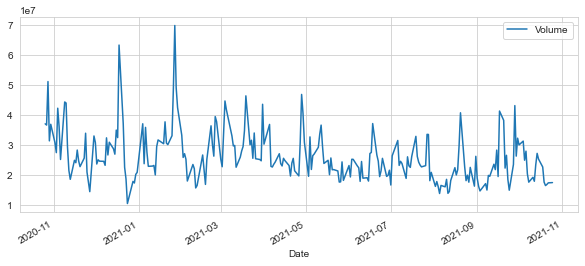

In [9]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
MSFT['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [10]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

print(MSFT['Adj Close'])

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    print(MSFT['Adj Close'].rolling(ma))
    print(MSFT['Adj Close'].rolling(ma).mean())
    MSFT[column_name] = MSFT['Adj Close'].rolling(ma).mean()

Date
2020-10-26    208.169846
2020-10-27    211.311005
2020-10-28    200.837097
2020-10-29    202.858566
2020-10-30    200.629028
                 ...    
2021-10-19    308.230011
2021-10-20    307.410004
2021-10-21    310.760010
2021-10-22    309.160004
2021-10-25    308.130005
Name: Adj Close, Length: 252, dtype: float64
Rolling [window=10,center=False,axis=0]
Date
2020-10-26           NaN
2020-10-27           NaN
2020-10-28           NaN
2020-10-29           NaN
2020-10-30           NaN
                 ...    
2021-10-19    298.871002
2021-10-20    300.301004
2021-10-21    301.892004
2021-10-22    303.323004
2021-10-25    304.713004
Name: Adj Close, Length: 252, dtype: float64
Rolling [window=20,center=False,axis=0]
Date
2020-10-26           NaN
2020-10-27           NaN
2020-10-28           NaN
2020-10-29           NaN
2020-10-30           NaN
                 ...    
2021-10-19    294.539001
2021-10-20    294.980502
2021-10-21    295.540503
2021-10-22    296.031003
2021-10-25    2

In [11]:
MSFT.head(n = 50)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-10-26,216.339996,208.100006,213.850006,210.080002,37111600.0,208.169846,NaN,NaN,NaN
2020-10-27,214.669998,210.330002,211.589996,213.250000,36700300.0,211.311005,NaN,NaN,NaN
2020-10-28,208.839996,202.100006,207.669998,202.679993,51195600.0,200.837097,NaN,NaN,NaN
2020-10-29,207.360001,203.369995,204.070007,204.720001,31432600.0,202.858566,NaN,NaN,NaN
2020-10-30,204.289993,199.619995,203.500000,202.470001,36953700.0,200.629028,NaN,NaN,NaN
2020-11-02,205.279999,200.119995,204.289993,202.330002,30842200.0,200.490295,NaN,NaN,NaN
2020-11-03,208.119995,203.119995,203.889999,206.429993,27512000.0,204.553009,NaN,NaN,NaN
2020-11-04,218.320007,212.419998,214.020004,216.389999,42311800.0,214.422455,NaN,NaN,NaN
2020-11-05,224.119995,221.149994,222.039993,223.289993,36080100.0,221.259720,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

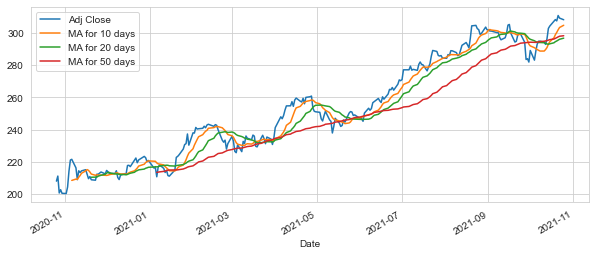

In [12]:
MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis

<AxesSubplot:xlabel='Date'>

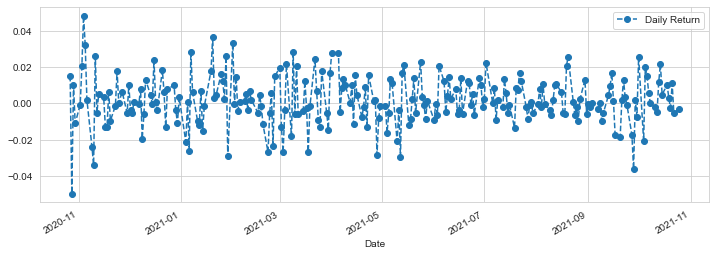

In [13]:
# We'll use pct_change to find the percent change for each day
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
MSFT['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

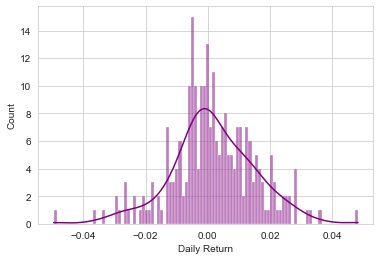

In [14]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.histplot(MSFT['Daily Return'].dropna(), bins = 100, color = 'purple', kde = True)

# Could have also done:
#AAPL['Daily Return'].hist()

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
# closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'], 'yahoo', start,end)['Adj Close']
closing_df = (pdr.yahoo.daily.YahooDailyReader(['AAPL','GOOG','MSFT','AMZN'], start, end).read())['Adj Close']

In [16]:
# Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-26,114.314751,1590.449951,208.169830,3207.040039
2020-10-27,115.854843,1604.260010,211.310989,3286.330078
2020-10-28,110.489349,1516.619995,200.837112,3162.780029
2020-10-29,114.583023,1567.239990,202.858566,3211.010010
2020-10-30,108.164307,1621.010010,200.629028,3036.149902


In [17]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

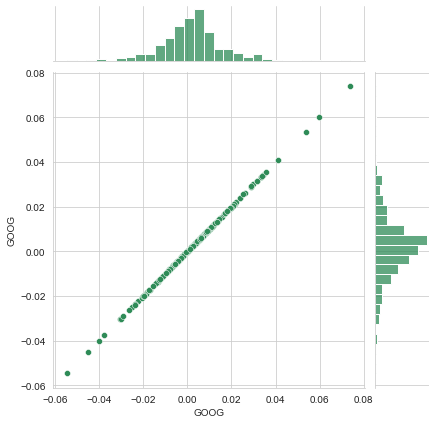

In [18]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x = 'GOOG', y = 'GOOG', data = tech_rets, kind = 'scatter', color = 'seagreen')

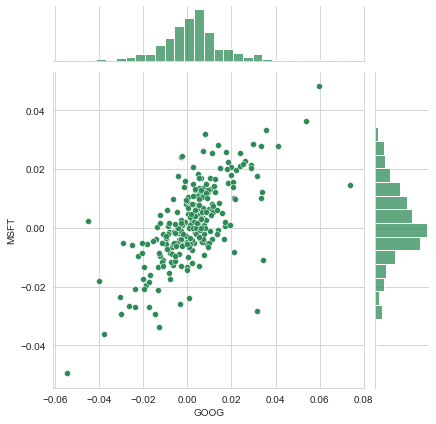

In [19]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x = 'GOOG', y = 'MSFT', data = tech_rets, kind = 'scatter', color = 'seagreen')

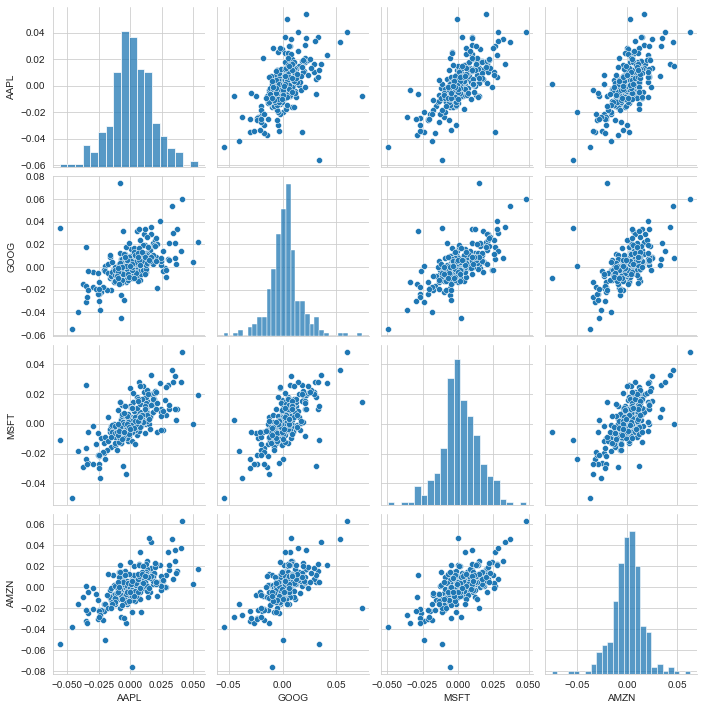

In [20]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

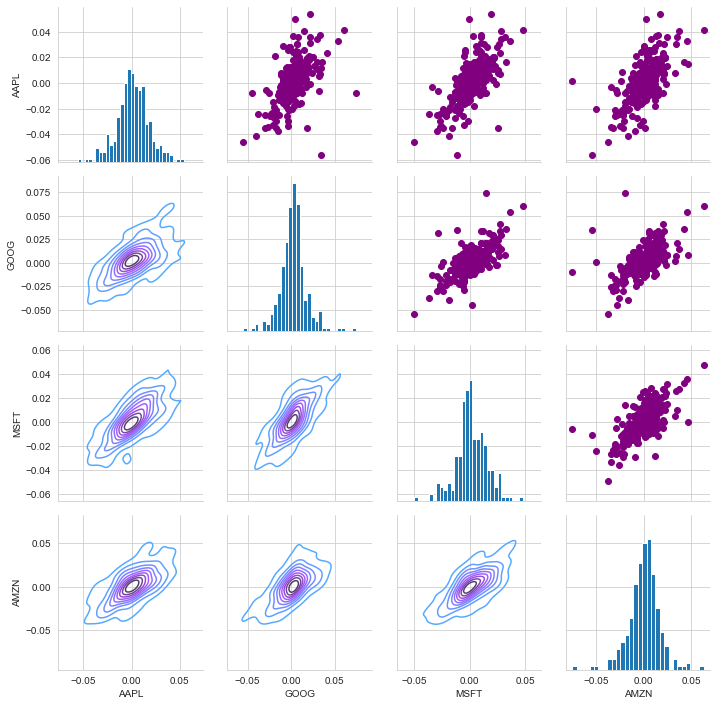

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color = 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins = 30)

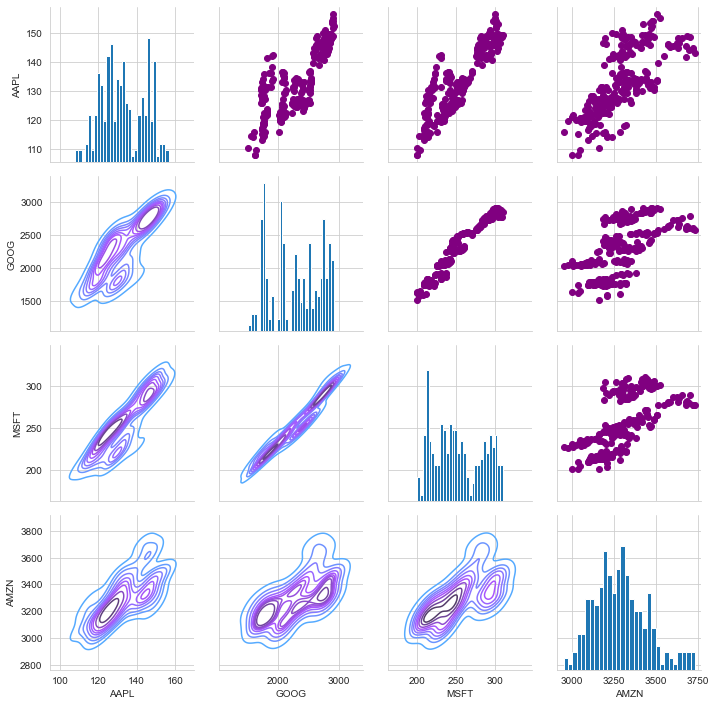

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist, bins = 30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

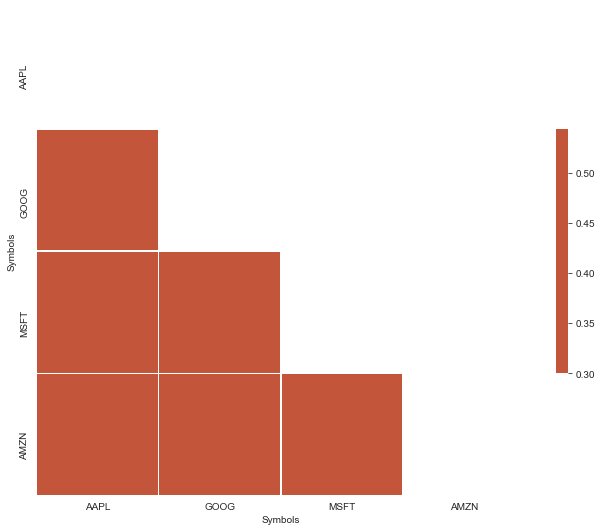

In [23]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
# sns.corrplot(tech_rets.dropna(),annot=True)
corr = (tech_rets.dropna()).corr()

# Generate a mask for the upper triangle
# np.ones_like() returns an array of the same shape filled with ones
# np.triu() returns a copy of the upper diagonal array, turning all at the bottom diagonal to be zero.
mask = np.triu(np.ones_like(corr, dtype=bool)) 

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Symbols      AAPL      GOOG      MSFT      AMZN
Symbols                                        
AAPL     1.000000  0.543672  0.697632  0.635509
GOOG     0.543672  1.000000  0.686876  0.559083
MSFT     0.697632  0.686876  1.000000  0.671944
AMZN     0.635509  0.559083  0.671944  1.000000
[[ True  True  True  True]
 [False  True  True  True]
 [False False  True  True]
 [False False False  True]]


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

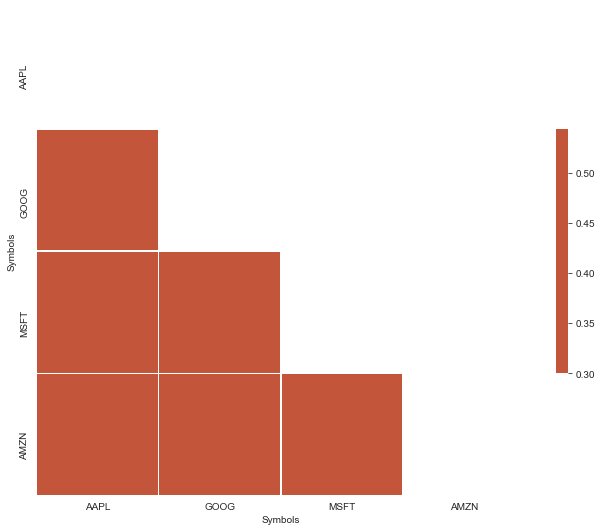

In [24]:
# Alternate Correlation Plot
corr = (tech_rets.dropna()).corr()

print(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
print(mask)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

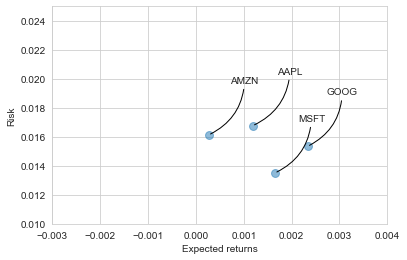

In [25]:
# Risk Analysis
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), alpha = 0.5, s = area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns') # In Statistics, Average
plt.ylabel('Risk') # In Statistics, Standard Deviation

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3',  color='black'))

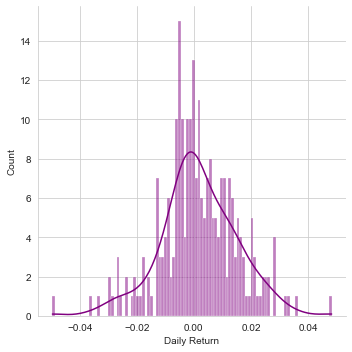

In [26]:
# Value at risk
sns.displot(MSFT['Daily Return'].dropna(), bins=100, color = 'purple', kde = True)

In [27]:
# The 0.05 empirical quantile of daily returns
rets['MSFT'].quantile(0.05) 
# at 95% confidence interval, what is the return rate? Or in layman terms, what is the return rate most of the time?

-0.02109010042998921

In [28]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [29]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt)) # Random value along a normalized distribution
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

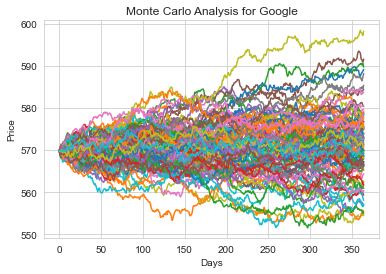

In [30]:
# Get start price from GOOG.head()
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [31]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];


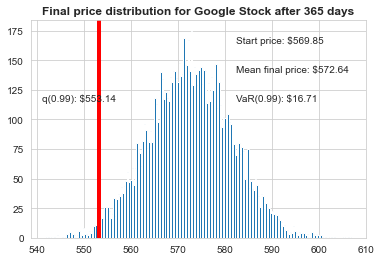

In [32]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');